In [1]:
from utils import config_gpu, draw_figure
session = config_gpu()

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

# np.save('../data/cifar10_train_x', x_train)
# np.save('../data/cifar10_train_y', y_train)

# np.save('../data/cifar10_test_x', x_test)
# np.save('../data/cifar10_test_y', y_test)

In [4]:
x_train = np.load('../data/cifar10_train_x.npy')
y_train = np.load('../data/cifar10_train_y.npy')

x_test = np.load('../data/cifar10_test_x.npy')
y_test = np.load('../data/cifar10_test_y.npy')

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
model = Sequential()

In [8]:
model.add(
    Conv2D(
        filters=32,
        input_shape=(32, 32, 3),
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)

In [9]:
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)

In [10]:
model.add(MaxPool2D(pool_size=(2, 2)))

In [11]:
model.add(Dropout(0.25))

In [12]:
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)

In [13]:
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)

In [14]:
model.add(MaxPool2D(pool_size=(2, 2)))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.output_shape

(None, 8, 8, 64)

In [17]:
model.add(Flatten())

In [18]:
model.output_shape

(None, 4096)

In [19]:
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
tsb = TensorBoard(log_dir='../logs/cifar10_base')

In [22]:
history_model1 = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=[tsb]
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 6s 144us/sample - loss: 3.5482 - accuracy: 0.3041 - val_loss: 1.5110 - val_accuracy: 0.4548
Epoch 2/20
40000/40000 [==============================] - 4s 107us/sample - loss: 1.5381 - accuracy: 0.4479 - val_loss: 1.3208 - val_accuracy: 0.5265
Epoch 3/20
40000/40000 [==============================] - 4s 109us/sample - loss: 1.3746 - accuracy: 0.5072 - val_loss: 1.1898 - val_accuracy: 0.5868
Epoch 4/20
40000/40000 [==============================] - 4s 109us/sample - loss: 1.2617 - accuracy: 0.5484 - val_loss: 1.1842 - val_accuracy: 0.5847
Epoch 5/20
40000/40000 [==============================] - 4s 109us/sample - loss: 1.1697 - accuracy: 0.5861 - val_loss: 1.0399 - val_accuracy: 0.6354
Epoch 6/20
40000/40000 [==============================] - 4s 109us/sample - loss: 1.0990 - accuracy: 0.6109 - val_loss: 0.9908 - val_accuracy: 0.6603
Epoch 7/20
40000/40000 [==========================

In [25]:
def draw_figure(model_history, key):

    yticks = model_history.history[key]
    xticks = range(len(yticks))

    fig, ax = plt.subplots()
    ax.grid(alpha=0.5, color='gray', linestyle='--')
    ax.tick_params(labelsize=12)
    ax.plot(xticks, yticks, color='blue')
    ax.set_xlabel('Epoch', fontsize=15)
    ax.set_ylabel(key, fontsize=15)

In [26]:
history_model1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

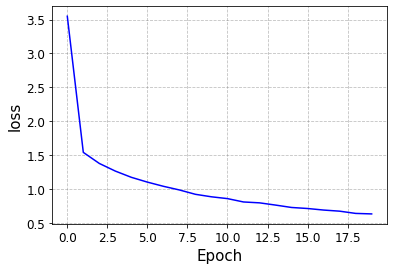

In [27]:
draw_figure(history_model1, 'loss')

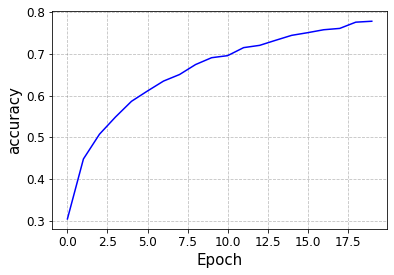

In [28]:
draw_figure(history_model1, 'accuracy')

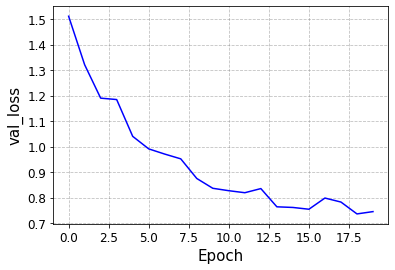

In [29]:
draw_figure(history_model1, 'val_loss')

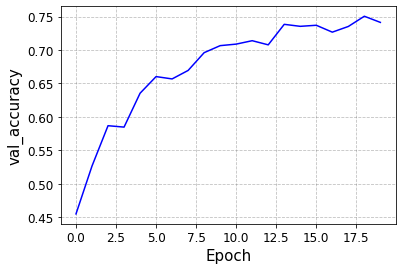

In [30]:
draw_figure(history_model1, 'val_accuracy')